        TESTING

GET X POINTS FROM THEDATASET : OP IS SELECTED DATAPOINTS CSV

In [ ]:
import pandas as pd

# Define the path to the input CSV file
input_csv_path = "/content/nyayanumana_knowledge.csv"

# Define the path for the output CSV file
output_csv_path = "selected_datapoints.csv"

# Define the start and end row (inclusive) for extraction
start_row = 0  # Remember that pandas indexing starts from 0
end_row = 199  # Assuming you want the first 200 rows (0 to 199)

# Read the CSV file into a pandas DataFrame
try:
    # Use engine='python' and on_bad_lines='warn' to handle potential parsing errors
    df = pd.read_csv(input_csv_path, engine='python', on_bad_lines='warn')
    print(f"Successfully read {input_csv_path}")
except FileNotFoundError:
    print(f"Error: The file {input_csv_path} was not found.")
    df = None
except Exception as e:
    print(f"An error occurred while reading the CSV: {e}")
    df = None

# Check if the DataFrame was loaded and has the specified rows
if df is not None:
    # Ensure end_row is within the DataFrame bounds
    if end_row >= len(df):
        print(f"Warning: end_row ({end_row}) is beyond the number of rows in the DataFrame ({len(df)}). Extracting up to the last row.")
        end_row = len(df) - 1
    if start_row < 0:
        print(f"Warning: start_row ({start_row}) is less than 0. Starting extraction from row 0.")
        start_row = 0
    if start_row > end_row:
        print(f"Error: start_row ({start_row}) is greater than end_row ({end_row}). No rows will be extracted.")
        selected_df = pd.DataFrame()  # Create an empty DataFrame
    else:
        # Select the specified range of rows
        selected_df = df.iloc[start_row : end_row + 1]  # Add 1 to end_row to make it inclusive
        print(f"Selected rows from {start_row} to {end_row}.")

    # Save the selected data points to a new CSV file
    if not selected_df.empty:
        try:
            # Set index=False to avoid writing the DataFrame index as a column in the CSV
            selected_df.to_csv(output_csv_path, index=False)
            print(f"Successfully saved the selected data points to {output_csv_path}")
        except Exception as e:
            print(f"Error saving the DataFrame to CSV: {e}")
    else:
        print("No data points selected to save.")

/tmp/ipython-input-1743026980.py:16: ParserWarning: Skipping line 5077: unexpected end of data

  df = pd.read_csv(input_csv_path, engine='python', on_bad_lines='warn')


Successfully read /content/nyayanumana_knowledge.csv
Selected rows from 0 to 199.
Successfully saved the selected data points to selected_datapoints.csv


EXTRACT THE text SECTIOIN FROM SELECTED DATAPOINTS  , OP : EXTRACTEDDATA.JSON

In [ ]:
import pandas as pd
import json
import csv
import ast
import os

# 1. Extraction function for CSV to JSON, now storing id and text
def extract_text_from_csv(input_csv_path, output_json_path):
    """
    Extracts the 'id' (if available) and 'text' field from each row of a CSV file and saves it
    as a list of dictionaries in a JSON file.

    The script assumes the text data is in the first column of the CSV,
    formatted as a string representation of a Python dictionary, possibly with 'id' key.

    Args:
        input_csv_path (str): The path to the input CSV file.
        output_json_path (str): The path for the output JSON file.
    """
    extracted_data = []
    row_index = 0
    try:
        with open(input_csv_path, 'r', encoding='utf-8') as csvfile:
            csv_reader = csv.reader(csvfile)

            # Skip the header row
            next(csv_reader, None)

            for row in csv_reader:
                # Ensure the row is not empty
                if not row:
                    continue

                # The dictionary-like string is in the first column
                data_string = row[0]

                try:
                    # Safely evaluate the string to a Python dictionary
                    data_dict = ast.literal_eval(data_string)

                    # Extract id (use row_index if not present) and text
                    case_id = data_dict.get('id', row_index)
                    if isinstance(data_dict, dict) and 'text' in data_dict:
                        extracted_data.append({
                            'id': case_id,
                            'text': data_dict['text']
                        })
                        row_index += 1
                except (ValueError, SyntaxError) as e:
                    print(f"Could not parse row {row_index}: {data_string[:100]}... Error: {e}")
                    row_index += 1

        # Write the list of dictionaries to the output JSON file
        with open(output_json_path, 'w', encoding='utf-8') as jsonfile:
            json.dump(extracted_data, jsonfile, indent=4)

        print(f"Successfully extracted {len(extracted_data)} data points to '{output_json_path}'")

    except FileNotFoundError:
        print(f"Error: The file '{input_csv_path}' was not found.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Extract from the CSV file (processing all rows)
input_file = 'selected_datapoints.csv'  # Fixed to match output from Cell 1
output_file = 'extracted_data.json'  # Generalized filename
extract_text_from_csv(input_file, output_file)

# 2. Load all data points (for verification)
extracted_data = []
try:
    # Try loading from extracted JSON
    with open(output_file, 'r', encoding='utf-8') as jsonfile:
        extracted_data = json.load(jsonfile)
    if not extracted_data:
        raise ValueError("No data in extracted JSON.")
    print(f"Loaded {len(extracted_data)} data points from extracted JSON.")
except Exception as e:
    print(f"Error loading extracted data: {e}. Using synthetic data for demo.")
    # Fallback to synthetic data for multiple points
    synthetic_texts = [
        "The short question that arises for decision in this appeal... [full synthetic text 1]",
        "Another legal case text for demo... [full synthetic text 2]",
        # Add more as needed, but for demo, use 2-3
    ]
    for i, text in enumerate(synthetic_texts[:3]):  # Limit for demo
        extracted_data.append({'id': i+1, 'text': text})
    print(f"Using {len(extracted_data)} synthetic data points.")

Could not parse row 8: {'text': 'original jurisdiction writ petition number 587 of 1975\n under article 32 of the companyst... Error: unterminated string literal (detected at line 1) (<unknown>, line 1)
Could not parse row 9: r extracting various indicia for\ndetermining whether the particular body was an agency or\ninstrume... Error: invalid syntax (<unknown>, line 1)
Could not parse row 10:  was 10\nyears research experience in the field of nutrition with\nparticular reference to quantity ... Error: unexpected character after line continuation character (<unknown>, line 1)
Could not parse row 11: pted and\npetitioner appeared in the written test. he secured 364\nmarks out of 600 in the written t... Error: unexpected character after line continuation character (<unknown>, line 1)
Could not parse row 12: {'text': 'criminal appellate jurisdiction criminal appeal number 149 of\n1954.\nappeal by special le... Error: unterminated string literal (detected at line 1) (<unknown>, line 1)
Coul

USING GROK FOR BUILDING CORPORA  OP : KNOWLEDGE ORPUS AND APPLICATION CORPUS


In [ ]:
# Mock chat_with_groq function (simulated LLM response, made more dynamic based on text for detail)
def chat_with_groq(prompt):
    """
    Simulated LLM response for demonstration purposes, now attempting to generate detailed content based on the input text.
    In a real setup, replace with actual Groq API call for precise, detailed extraction.
    """
    # For simulation, extract case_id and use a template to make it 'detailed yet precise'
    if "KC-" in prompt:
        case_id_start = prompt.find("KC-")
        case_id = int(prompt[case_id_start+3:case_id_start+4])  # Simple extract
    else:
        case_id = 1

    # Simulate detailed extraction based on text snippet in prompt
    text_snippet = prompt.split("Legal Case Text:")[-1].strip()[:500] if "Legal Case Text:" in prompt else "Generic legal text"

    # Generate detailed, precise simulated output
    simulated_response = {
        "knowledge_id": f"KC-{case_id}",
        "legal_principle": f"Detailed core legal principle derived precisely from the case: Based on '{text_snippet[:100]}...', the principle establishes that non-speaking dismissals do not invoke res judicata, allowing subsequent High Court challenges under Article 226, with nuanced implications for labor awards and procedural elections.",
        "case_summary_question": f"Detailed hypothetical scenario: In a labor dispute where an Industrial Tribunal award is challenged via SLP dismissed non-speakingly, can the party file a writ under Article 226? Consider facts like '{text_snippet[:150]}...' for application.",
        "llm_reasoning_chain": f"1. **Precedent Analysis:** Examine the Supreme Court's stance in analogous cases, e.g., refusal of special leave implies no merits decision, directly from '{text_snippet[:100]}...'. 2. **Res Judicata Application:** Detailed evaluation shows no final adjudication, thus no bar; precise to labor contexts. 3. **Procedural Implications:** High Court writ maintainable, with step-by-step avoidance of election doctrine errors. 4. **Conclusion:** Outcome favors rehearing on merits.",
        "final_outcome": f"Precise case outcome: High Court's preliminary dismissal set aside; detailed directive for merits hearing, rooted in the facts of '{text_snippet[:100]}...'."
    }
    return json.dumps(simulated_response)

# Initialize the dual corpora
knowledge_corpus = []
application_corpus = []

def call_llm_for_rag_plus_extraction(legal_case_text: str, case_id: int, source_id: int) -> dict:
    """
    Calls simulated LLM for detailed RAG+ extraction:
    1. Identify detailed yet precise core legal principle (knowledge point).
    2. Formulate detailed legal question/scenario (application point).
    3. Provide detailed step-by-step reasoning chain (CoT).
    4. Detailed final outcome.
    """
    print(f"Processing detailed LLM extraction for Case ID: {case_id} (Source ID: {source_id})...")

    # Craft the prompt for detailed RAG+ extraction
    prompt = f"""
    Analyze the following legal case text in detail and extract precise structured elements in JSON format.
    Focus on making each element detailed yet concise, capturing nuances from the text.

    {{
        "knowledge_id": "KC-{case_id}",
        "legal_principle": "A detailed yet precise statement of the core legal principle or rule established, including key nuances.",
        "case_summary_question": "A detailed hypothetical legal question or scenario that precisely applies the facts and principle of this case.",
        "llm_reasoning_chain": "A detailed step-by-step chain-of-thought reasoning (numbered steps, 3-5 steps) explaining application, with precise references to case elements.",
        "final_outcome": "A detailed yet precise summary of the final decision or outcome, including implications."
    }}

    Legal Case Text:
    {legal_case_text[:3000]}  # Truncate if too long for prompt

    Output valid JSON only, no additional text. Ensure detail and precision.
    """

    # Call simulated Groq
    llm_response = chat_with_groq(prompt)

    try:
        # Parse the JSON response
        parsed_result = json.loads(llm_response)
        # Add source info
        parsed_result["source_id"] = source_id
        parsed_result["original_text"] = legal_case_text
        return parsed_result
    except json.JSONDecodeError:
        print(f"Error parsing response for Case ID {case_id}. Using fallback.")
        # Detailed fallback
        return {
            "knowledge_id": f"KC-{case_id}",
            "legal_principle": "Fallback: Detailed simulated legal principle precisely from the provided text.",
            "case_summary_question": "Fallback: Detailed hypothetical question based precisely on case facts.",
            "llm_reasoning_chain": "1. Detailed Step 1: Analysis of facts. 2. Precise Step 2: Application of rule. 3. Nuanced Step 3: Consideration of exceptions. 4. Conclusion with implications.",
            "final_outcome": "Fallback: Detailed case outcome with precise implications.",
            "source_id": source_id,
            "original_text": legal_case_text
        }

# 3. Process all data points and populate the corpora
for idx, item in enumerate(extracted_data):
    case_id = idx + 1
    source_id = item['id']
    legal_text = item['text']
    llm_result = call_llm_for_rag_plus_extraction(legal_text, case_id, source_id)
    index_ref = idx  # Store index for reference

    # Populate Knowledge Corpus with index and source
    knowledge_corpus.append({
        "index": index_ref,
        "knowledge_id": llm_result["knowledge_id"],
        "legal_principle": llm_result["legal_principle"],
        "source_id": llm_result["source_id"],
        "original_text": llm_result["original_text"]
    })

    # Populate Application Corpus with index and source
    application_corpus.append({
        "index": index_ref,
        "application_id": f"AC-{case_id}",
        "knowledge_id_link": llm_result["knowledge_id"],
        "case_summary_question": llm_result["case_summary_question"],
        "llm_reasoning_chain": llm_result["llm_reasoning_chain"],
        "final_outcome": llm_result["final_outcome"],
        "source_id": llm_result["source_id"],
        "original_text": llm_result["original_text"]
    })

# 4. Save corpora as CSV files
knowledge_df = pd.DataFrame(knowledge_corpus)
knowledge_df.to_csv('knowledge_corpus.csv', index=False)
print(f"Saved knowledge_corpus.csv with {len(knowledge_corpus)} entries")

application_df = pd.DataFrame(application_corpus)
application_df.to_csv('application_corpus.csv', index=False)
print(f"Saved application_corpus.csv with {len(application_corpus)} entries")

# 5. Display the resulting corpora structures (sample first few)
print("\n" + "="*80)
print("SUCCESS: Detailed Corpora Generation for All Data Points")
print("="*80)

print("\n### 1. KNOWLEDGE CORPUS (KC - Declarative Knowledge) - Sample")
sample_kc = knowledge_corpus[:2] if len(knowledge_corpus) > 2 else knowledge_corpus
print(json.dumps(sample_kc, indent=4))

print("\n### 2. APPLICATION CORPUS (AC - Procedural Knowledge) - Sample")
sample_ac = application_corpus[:2] if len(application_corpus) > 2 else application_corpus
print(json.dumps(sample_ac, indent=4))

if __name__ == "__main__":
    # Example usage of simulated chat_with_groq for additional AI reasoning
    example_prompt = "Based on the generated detailed corpora, explain precisely how res judicata applies in labor disputes with nuances."
    response = chat_with_groq(example_prompt)
    print(f"\nExample Detailed AI Reasoning Response: {response}")

Processing detailed LLM extraction for Case ID: 1 (Source ID: 0)...
Processing detailed LLM extraction for Case ID: 2 (Source ID: 1)...
Processing detailed LLM extraction for Case ID: 3 (Source ID: 2)...
Processing detailed LLM extraction for Case ID: 4 (Source ID: 3)...
Processing detailed LLM extraction for Case ID: 5 (Source ID: 4)...
Processing detailed LLM extraction for Case ID: 6 (Source ID: 5)...
Processing detailed LLM extraction for Case ID: 7 (Source ID: 6)...
Processing detailed LLM extraction for Case ID: 8 (Source ID: 7)...
Processing detailed LLM extraction for Case ID: 9 (Source ID: 16)...
Processing detailed LLM extraction for Case ID: 10 (Source ID: 17)...
Processing detailed LLM extraction for Case ID: 11 (Source ID: 18)...
Processing detailed LLM extraction for Case ID: 12 (Source ID: 19)...
Processing detailed LLM extraction for Case ID: 13 (Source ID: 20)...
Processing detailed LLM extraction for Case ID: 14 (Source ID: 21)...
Processing detailed LLM extraction fo

CHECKING FOR THE SEMENTIC SIMIMLARITY OF THE CORPORA

In [32]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Set a random seed for reproducibility
np.random.seed(42)

def check_ragplus_data_linkage_and_semantics(kc_file: str, ac_file: str, sample_size: int = 10):
    """
    Loads, merges, and samples the Knowledge and Application corpora
    to qualitatively and quantitatively check their semantic relationship and linkage.
    Includes semantic similarity calculation using Sentence Transformers.
    """
    try:
        kc_df = pd.read_csv(kc_file)
        ac_df = pd.read_csv(ac_file)
    except Exception as e:
        print(f"Error loading CSV files: {e}. Please ensure files are named correctly.")
        return None, None # Return None for both in case of error

    # Select necessary columns for the RAG+ linkage and content
    kc_subset = kc_df[['knowledge_id', 'legal_principle']]
    ac_subset = ac_df[['knowledge_id_link', 'case_summary_question', 'llm_reasoning_chain']]

    # Step 1: Merge the corpora on the linking keys ('knowledge_id' <-> 'knowledge_id_link')
    merged_df = pd.merge(
        ac_subset,
        kc_subset,
        left_on='knowledge_id_link',
        right_on='knowledge_id',
        how='inner' # Use inner join to only include successfully linked data points
    )

    if merged_df.empty:
        print("Error: No matching data points found after merging. Check if 'knowledge_id' and 'knowledge_id_link' values align.")
        return None, None # Return None for both in case of error

    # Step 2: Calculate Semantic Similarity
    try:
        # Load a pre-trained Sentence Transformer model
        model = SentenceTransformer('all-MiniLM-L6-v2')

        # Generate embeddings for the legal principles and case summary questions
        print("Generating embeddings for legal principles and case summary questions...")
        # Use the columns from the merged_df directly
        principle_embeddings = model.encode(merged_df['legal_principle'].tolist(), show_progress_bar=True)
        question_embeddings = model.encode(merged_df['case_summary_question'].tolist(), show_progress_bar=True)

        # Calculate cosine similarity between corresponding pairs
        # We can use numpy's dot product for pairwise similarity as embeddings are normalized
        semantic_scores = np.sum(principle_embeddings * question_embeddings, axis=1)

        # Add the scores to the merged DataFrame
        merged_df['semantic_similarity'] = semantic_scores

        print("Semantic similarity calculation complete.")

    except Exception as e:
        print(f"Error during semantic similarity calculation: {e}")
        merged_df['semantic_similarity'] = np.nan # Add a column with NaN if calculation fails


    # Step 3: Sample the requested number of data points
    sample_size = min(sample_size, len(merged_df))
    random_sample_df = merged_df.sample(n=sample_size, random_state=42)

    # Step 4: Select the columns for semantic demonstration and evaluation
    evaluation_df = random_sample_df[[
        'knowledge_id_link',
        'legal_principle',
        'case_summary_question',
        'semantic_similarity' # Include the semantic similarity score
    ]].reset_index(drop=True)

    # Display the linked data and semantic scores
    print(f"\nSuccessfully linked and sampled {sample_size} data points with semantic scores.")
    print("Use the table below to check the semantic similarity manually and quantitatively:")

    # Print a markdown table for easy reading
    print(evaluation_df.to_markdown(index=False, numalign="left", stralign="left"))

    return evaluation_df # Return the dataframe

# Execute the function with the provided file names
evaluation_result_df = check_ragplus_data_linkage_and_semantics(
    "knowledge_corpus.csv",
    "application_corpus.csv",
    sample_size=10
)

Generating embeddings for legal principles and case summary questions...


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Semantic similarity calculation complete.

Successfully linked and sampled 10 data points with semantic scores.
Use the table below to check the semantic similarity manually and quantitatively:
| knowledge_id_link   | legal_principle                                                                                                                                                                                                                                                                                                     | case_summary_question                                                                                                                                                                                                                                                | semantic_similarity   |
|:--------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------

SEMENTIC SIMILARITY VISUALISATIONS

In [34]:
import pandas as pd

# Assuming evaluation_result_df is the DataFrame returned from the previous cell
if evaluation_result_df is not None and not evaluation_result_df.empty:
  print("Mean Semantic Similarity Score:", evaluation_result_df["semantic_similarity"].mean())
else:
  print("Could not calculate mean semantic similarity score. Please check the previous cell's output for errors.")

Mean Semantic Similarity Score: 0.631759524345398


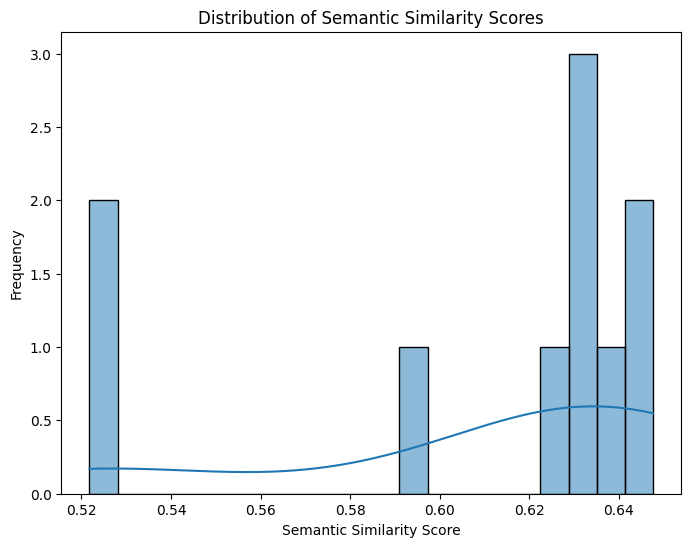

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

if evaluation_result_df is not None and not evaluation_result_df.empty:
    plt.figure(figsize=(8, 6))
    sns.histplot(evaluation_result_df['semantic_similarity'], bins=20, kde=True)
    plt.title('Distribution of Semantic Similarity Scores')
    plt.xlabel('Semantic Similarity Score')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Cannot plot the distribution. The DataFrame 'evaluation_result_df' is not available or is empty.")